In [1]:
import numpy as np
import pandas as pd
import csv
import math
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.integrate import quad
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


In [2]:
#format plot


plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text', usetex=True)
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


count_figure=0
%matplotlib inline 

results/initial_precipitation_distribution_1050C_strain_rate0.000E+00.txt
(90,)
(90,)


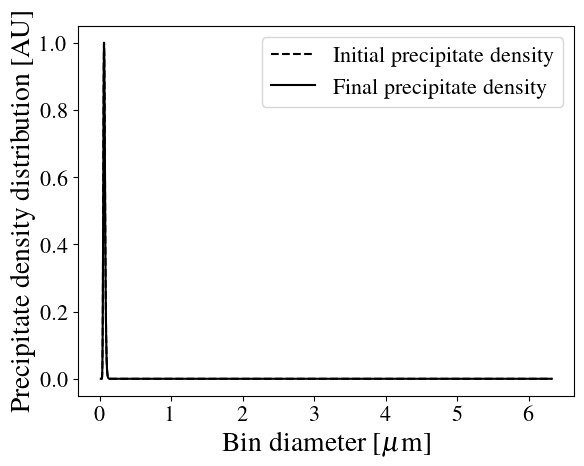

In [15]:
#chose the strain rates and temperatures for which to display the result 
strain_rate=[0]
temperature_max=[1050]

#prefix for folder where the results are stored
prefix='results/'

initial_precipitate_distribution=[]
leg=[]

suffix=[]
for j in range(len(strain_rate)):
    for i  in range(len(temperature_max)):
        #the suffix of the result files depends on the temperature and strain rate considered
        suffix.append("{temperature}C_strain_rate{str:3.3E}.txt".format(temperature=temperature_max[i], str=strain_rate[j]))
#print(suffix)

for j in range(len(strain_rate)):
    for i  in range(len(temperature_max)):
     
        
        #load and display the initial precipitate distribution
        file_name= "{pre}initial_precipitation_distribution_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        print(file_name)
        data_0=np.genfromtxt(file_name, skip_header=1)
        radius_bin=data_0[:,0]
        print(radius_bin.shape)
        precipitate_density_0=data_0[:,1]
        print(precipitate_density_0.shape)
        f=plt.plot(radius_bin*1e6*2, precipitate_density_0/max(precipitate_density_0),'--', color='k', label='Initial precipitate density' )
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        #load and display the final precipitate distribution
        file_name= "{pre}precipitation_distribution_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        data_0=np.genfromtxt(file_name, skip_header=1)
        final_precipitate_density=data_0
        final_precipitate_density[np.isnan(final_precipitate_density)] = 0
        count_figure=count_figure+1
        plt.plot(radius_bin*1e6*2, final_precipitate_density/max(final_precipitate_density),  color='k', label='Final precipitate density')
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        plt.legend()
        plt.xlabel('Bin diameter [$\mu$m]')
        plt.ylabel('Precipitate density distribution [AU]')
    


results/initial_precipitation_distribution_1050C_strain_rate0.000E+00.txt
(110,)
(109,)
vf 0.16476245921397178
probability 0.0021266979216901217
mean radius volumetric fraction 1.747252803465326e-06


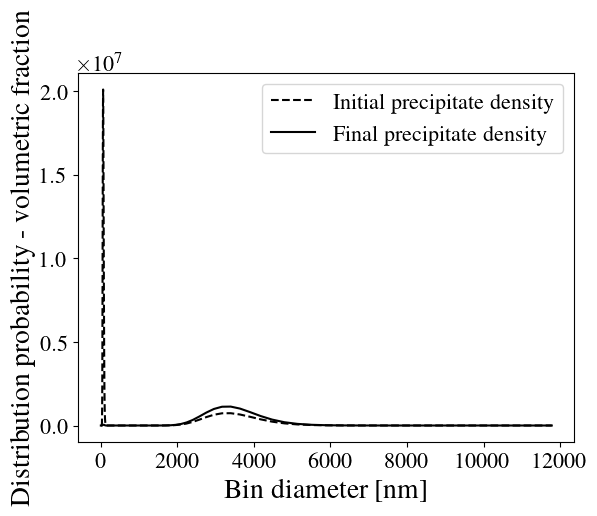

In [23]:
for j in range(len(strain_rate)):
    for i  in range(len(temperature_max)):
     
        
        #load and display the initial precipitate distribution
        file_name= "{pre}initial_precipitation_distribution_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        print(file_name)
        data_0=np.genfromtxt(file_name, skip_header=1)
        radius_bin=data_0[:,0]
        print(radius_bin.shape)
        precipitate_density_0=data_0[0:-1,1]
        print(precipitate_density_0.shape)
        f=plt.plot(radius_bin[0:-1]*1e9*2, precipitate_density_0*4/3*np.pi*radius_bin[0:-1]**3/(np.sum(precipitate_density_0*4/3*np.pi*radius_bin[0:-1]**3*np.diff(radius_bin))),'--', color='k', label='Initial precipitate density' )
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        #load and display the final precipitate distribution
        file_name= "{pre}precipitation_distribution_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        data_0=np.genfromtxt(file_name, skip_header=1)
        final_precipitate_density=data_0
        final_precipitate_density[np.isnan(final_precipitate_density)] = 0
        final_precipitate_density=final_precipitate_density[0:-1]
        count_figure=count_figure+1
        f=plt.plot(radius_bin[0:-1]*1e9*2, final_precipitate_density*4/3*np.pi*radius_bin[0:-1]**3/(np.sum(final_precipitate_density*4/3*np.pi*radius_bin[0:-1]**3*np.diff(radius_bin))),'-', color='k', label='Final precipitate density' )
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        plt.legend()
        plt.xlabel('Bin diameter [nm]')
        plt.ylabel('Distribution probability - volumetric fraction')
probability=final_precipitate_density*4/3*np.pi*radius_bin[0:-1]**3/(np.sum(final_precipitate_density*4/3*np.pi*radius_bin[0:-1]**3*np.diff(radius_bin)))    
print('vf',np.sum(final_precipitate_density*4/3*np.pi*radius_bin[0:-1]**3*np.diff(radius_bin)))
print('probability',np.sum(probability)*(radius_bin[1]-radius_bin[0]))
print('mean radius volumetric fraction', np.sum(radius_bin[0:-1]*probability*np.diff(radius_bin)))

results/initial_precipitation_distribution_1050C_strain_rate0.000E+00.txt
(110,)
(109,)


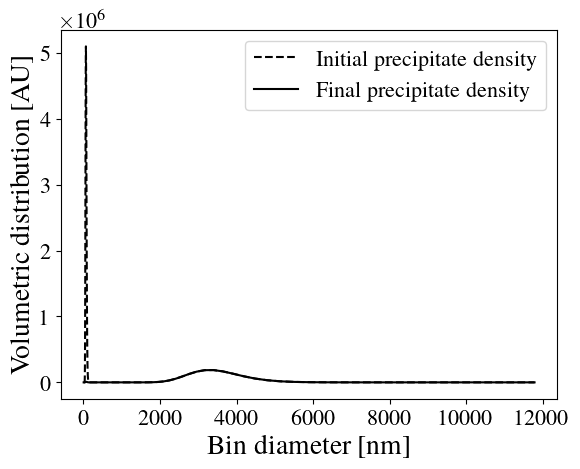

In [24]:
for j in range(len(strain_rate)):
    for i  in range(len(temperature_max)):
     
        
        #load and display the initial precipitate distribution
        file_name= "{pre}initial_precipitation_distribution_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        print(file_name)
        data_0=np.genfromtxt(file_name, skip_header=1)
        radius_bin=data_0[:,0]
        print(radius_bin.shape)
        precipitate_density_0=data_0[0:-1,1]
        print(precipitate_density_0.shape)
        f=plt.plot(radius_bin[0:-1]*1e9*2, precipitate_density_0*4/3*np.pi*radius_bin[0:-1]**3,'--', color='k', label='Initial precipitate density' )
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        #load and display the final precipitate distribution
        file_name= "{pre}precipitation_distribution_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        data_0=np.genfromtxt(file_name, skip_header=1)
        final_precipitate_density=data_0
        final_precipitate_density[np.isnan(final_precipitate_density)] = 0
        final_precipitate_density=final_precipitate_density[0:-1]
        count_figure=count_figure+1
        f=plt.plot(radius_bin[0:-1]*1e9*2, final_precipitate_density*4/3*np.pi*radius_bin[0:-1]**3,'-', color='k', label='Final precipitate density' )
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        plt.legend()
        plt.xlabel('Bin diameter [nm]')
        plt.ylabel('Volumetric distribution [AU]')


In [6]:
#display the KWN parameters
for j in range(len(strain_rate)):

    file_name= "{pre}KWN_parameters_{end}".format(pre=prefix,end=suffix[j])
    with open(file_name, 'r') as f:
        print(f.read())
    
    print('')
    print('')

  
 KWN parameters
  
Interfacial energy:   0.090 J/m^2
Migration energy:                   0.269000E+06 J/mol
D0:                   0.294000E-03 m^2/s
  
 Initial distribution
Initial mean radius:                   0.150000E-05 m
Initial volume fraction:   0.139
Standard deviation:                   0.000000E+00
Shape parameter:   0.200
  
Starting bin :                  -0.800000E+01 m
Bin width :                   0.300000E-01 m
Number of steps :   90
  
 Vacancy model parameters 
Vacancy formation energy:   0.520 [eV]
Vacancy migration energy:   0.930 [eV]
Pre-factor diffusion vacancy:                   0.100000E-04 [m^2/s]
Mechanical vacancy production constant:   0.035 []
Vacancy sink spacing (grain size):                   0.500000E-04 [m]
Jog formation energy:   0.300 [eV]
Dislocation arrangement parameter:  10.000 []
Initial dislocation density:                   0.100000E+15 [/m^2]
Saturation dislocation density:                   0.100000E+15 [/m^2]
 
 Deformation conditions

In [7]:
time=[]
mean_radius=[]
precipitate_density=[]
vf=[]
nucleation_rate=[]
critical_radius=[]
concentration_matrix=[]
growth_rate=[]


for j in range(len(strain_rate)):
#for j in [1]   : 
    for i  in range(len(temperature_max)):
    
       # print(j)
        file_name= "{pre}kinetics_data_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        
       # print(file_name)
        data=[]
        data=np.genfromtxt(file_name, skip_header=4)
        time.append(data[:,0])
        mean_radius.append(data[:,1]) #nm 
        
        precipitate_density.append(data[:,2]) #/micron^3
        vf.append(data[:,3]) #
        nucleation_rate.append(data[:,5]) #per micron^3
        critical_radius.append(data[:,4]) #nm
        concentration_matrix.append(data[:,6]) #
        growth_rate.append(np.diff(data[:,1])/np.diff(data[:,0]))
        
        #load 'apparent precipitate distribution depending on limit of detectability
        file_name= "{pre}apparent_precipitates_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        data=np.genfromtxt(file_name, skip_header=0)
        time_apparent=data[:,0]
        radius_apparent=data[:,1]
        vf_apparent=data[:,2]
        N_apparent=data[:,3]
        
        #load and display the initial precipitate distribution
        file_name= "{pre}temperature_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        print(file_name)
        data_0=np.genfromtxt(file_name, skip_header=1)
        
        


results/temperature_1050C_strain_rate0.000E+00.txt


/tmp/ipykernel_17791/385509356.py:42: UserWarning: genfromtxt: Empty input file: "results/temperature_1050C_strain_rate0.000E+00.txt"
  data_0=np.genfromtxt(file_name, skip_header=1)


Final apparent radius 2999.43606


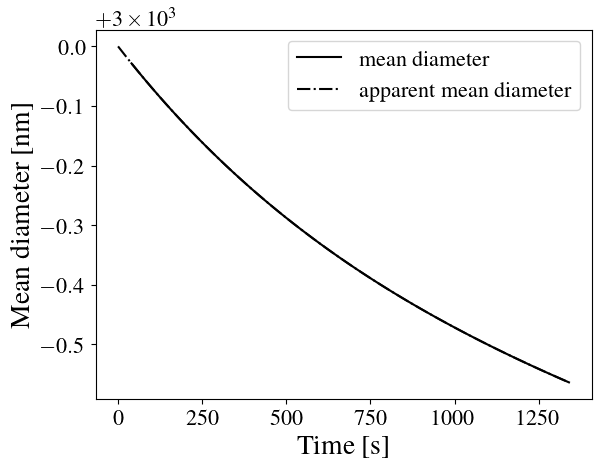

In [8]:
j=0 #without deformation
leg=[]
f_radius=[]
for j in range(len(strain_rate)):
#for j in [0]:
        
    leg.append("Strain rate : {strain_rate}".format(strain_rate=strain_rate[j]))
       
    for i  in range(len(temperature_max)):
    
        fig,ax = plt.subplots()
        #plt.figure(i)
        plt.xlabel('Time [s]')
        plt.ylabel('Mean diameter [nm]')
        
        #for j in [3]:
        f1=plt.plot(time[len(temperature_max)*j+i], mean_radius[len(temperature_max)*j+i]*2, 'k', label='mean diameter')
        colour=f1[0].get_color()
        plt.plot(time_apparent, radius_apparent*2, '-.k', label='apparent mean diameter')
        print('Final apparent radius', 2*radius_apparent[-1])
       # ax2=ax.twinx()

       # plt.xlim([0,(temperature_max[i]-20)/heating_rate+30])
        

       # plt.ylim([1.12,1.2])
    #f2=plt.plot(time[0], critical_radius[0],'--k')
#plt.figure(1)

#plt.legend(['Mean radius', 'r*'])
#plt.xlim([10**0, 10**4.5])

#plt.legend(leg)
plt.draw
plt.show
plt.savefig('fig_time_radius_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
plt.legend()
    

1600.29


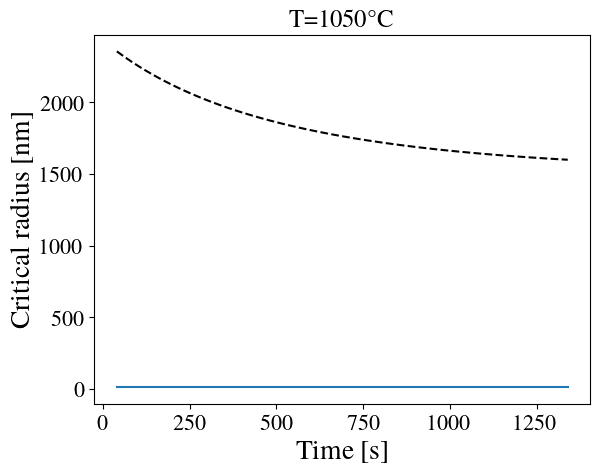

In [9]:
j=0 #without deformation
leg=[]
f_radius=[]
for j in range(len(strain_rate)):
#for j in [0]:
        
    #leg.append("Strain rate : {strain_rate}".format(strain_rate=strain_rate[j]))
       
    for i  in range(len(temperature_max)):
    

        plt.plot(time[len(temperature_max)*j+i], critical_radius[len(temperature_max)*j+i], '--k')
        
        plt.ylabel('Critical radius [nm]')

             #print(max(mean_radius[3*j+i])-min(mean_radius[3*j+i]))
       # plt.legend(leg)  
        plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
       # plt.xlim([0,(temperature_max[i]-20)/heating_rate+30])
        
        f_radius.append(interpolate.interp1d(time[len(temperature_max)*j+i],mean_radius[len(temperature_max)*j+i]))
        
        plt.plot([time[len(temperature_max)*j+i][0], time[len(temperature_max)*j+i][-1]], [radius_bin[1]*1e9, radius_bin[1]*1e9])
        
        plt.xlabel('Time [s]')
        
        
        
print(min(min(critical_radius)) )
       # plt.ylim([1.12,1.2])
    #f2=plt.plot(time[0], critical_radius[0],'--k')
#plt.figure(1)

#plt.legend(['Mean radius', 'r*'])
#plt.xlim([10**0, 10**4.5])

#plt.legend(leg)
plt.draw
plt.show
plt.savefig('fig_time_radius_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
    

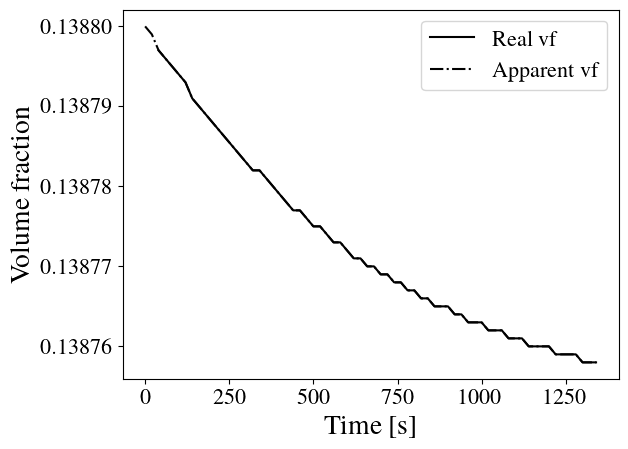

In [10]:
j=0 #without deformation
leg=[]
for j in range(len(strain_rate)):        
    #leg.append("Strain rate : {strain_rate}".format(strain_rate=strain_rate[j]))
       
    for i  in range(len(temperature_max)):        
        plt.figure(i)
        plt.xlabel('Time [s]')
        plt.ylabel('Volume fraction')        
        #for j in [3]:
        f1=plt.plot(time[len(temperature_max)*j+i], vf[len(temperature_max)*j+i], 'k', label='Real vf')
        colour=f1[0].get_color()
        plt.plot(time_apparent, vf_apparent, '-.k', label='Apparent vf')
          
        #plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
        #plt.xlim([1,10000])
plt.legend()
plt.savefig('fig_vf_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
          

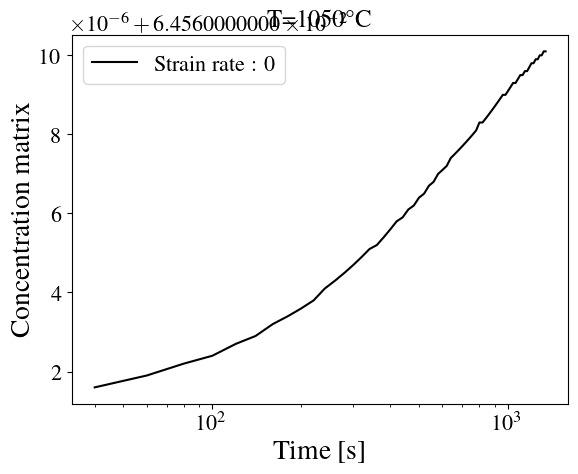

In [11]:
j=0 #without deformation
leg=[]
for j in range(len(strain_rate)):        
    leg.append("Strain rate : {strain_rate}".format(strain_rate=strain_rate[j]))
       
    for i  in range(len(temperature_max)):        
        plt.figure(i)
        plt.xlabel('Time [s]')
        plt.ylabel('Concentration matrix')
        #for j in [3]:
        f1=plt.semilogx(time[len(temperature_max)*j+i], concentration_matrix[len(temperature_max)*j+i], 'k')
        colour=f1[0].get_color()
        plt.legend(leg)  
        plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
        #plt.xlim([1,1000])
plt.savefig('fig_time_concentration_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
          

0.0


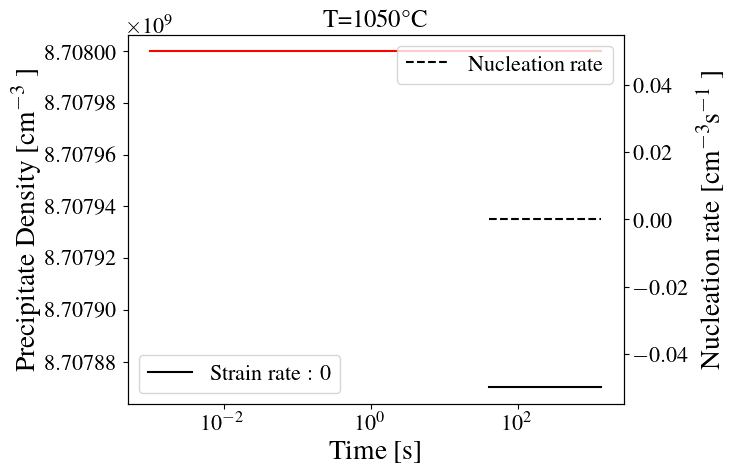

In [12]:

j=0 #without deformation
leg=[]
for j in range(len(strain_rate)):        
    leg.append("Strain rate : {strain_rate}".format(strain_rate=strain_rate[j]))
       
    for i  in range(len(temperature_max)):        
        fig,ax = plt.subplots()
        plt.xlabel('Time [s]')
        plt.ylabel('Precipitate Density [cm$^{-3}$ ]')        
        #for j in [3]:
        plt.semilogx(time[len(temperature_max)*j+i], precipitate_density[len(temperature_max)*j+i]*10**12, 'k', label='Number density')
        plt.semilogx(time_apparent, N_apparent*10**12, '-r', label='Apparent N')
        plt.legend(leg)  
        
        locs, labels = plt.xticks() 
        colour=f1[0].get_color()
       
        plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
        ax2=ax.twinx()
        ax2.semilogx(time[len(temperature_max)*j+i], nucleation_rate[len(temperature_max)*j+i]*10**12, '--k',label='Nucleation rate')
        plt.ylabel('Nucleation rate [cm$^{-3}$s$^{-1}$ ]')

#plt.xlim([10**0.5, 10**4.5])   
plt.legend()
print(max(nucleation_rate[len(temperature_max)*j+i]*10**12))
plt.savefig('fig_time_precipitate_density_nucleation_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')
    